In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from time import time

In [6]:
from sklearn.svm import SVC

In [7]:
svm=SVC()

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
import  matplotlib.pyplot as plt

In [13]:
from sklearn.feature_selection import RFE

In [14]:
from sklearn.feature_selection import SelectFromModel

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
df=pd.read_csv(r"C:\Users\user\Desktop\ABCD\Verification-of-Parkinson-s-Disease-through-Voice-Data-master\Verification-of-Parkinson-s-Disease-through-Voice-Data-master\parkinsons.csv")

In [18]:
pd.set_option("display.max_columns",30)

In [19]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [20]:
df.shape

(195, 24)

In [21]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [22]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [23]:
df.groupby(["status"]).mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [24]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [25]:
a=df["status"].value_counts()

In [26]:
labels=["PD Patients","Contro Group"]

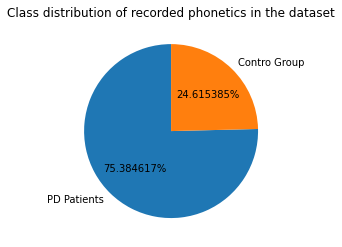

In [27]:
plt.pie(a,labels=labels,startangle=90,autopct='%1f%%')
plt.title("Class distribution of recorded phonetics in the dataset")
plt.show()

In [28]:
a

1    147
0     48
Name: status, dtype: int64

In [29]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [30]:
x=df.drop(["name","status"],axis="columns")

In [31]:
x.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [32]:
x.shape

(195, 22)

In [33]:
y=df.status

In [34]:
y.shape[0],x.shape[0]

(195, 195)

In [35]:
y.value_counts()

1    147
0     48
Name: status, dtype: int64

In [450]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
len(x_train)

156

In [38]:
len(x_test)

39

# BEFORE FEATURE_SELECTION

In [39]:
model_params={
    
    "svm":{
        "model1":SVC(gamma='auto'),
        "params":{
            "C":[10,20,30,40],
            "kernel":["rbf","linear"]
                }
                 
        },
    "random_forest":{
        
        "model1":RandomForestClassifier(),
        "params":{
            "n_estimators":[10,15,20,30]
        }
        
        
        },
    "logistic_regression":{
        "model1":LogisticRegression(solver="liblinear",multi_class="auto"),
        "params":{
            "C":[1,5,10,15]
        }
    },
    
    "GuassianNB":{
        
        "model1":GaussianNB(),
        "params":{ }
    }
    
        
}

In [40]:
score=[]

In [41]:
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model1'],mp["params"],cv=10,return_train_score=False)
    clf.fit(x,y)
    score.append({
        "model ":model_name,
        "best_score ":clf.best_score_,
        "best_params ":clf.best_params_,
    })

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarn

In [42]:
score

[{'model ': 'svm',
  'best_score ': 0.8358974358974359,
  'best_params ': {'C': 10, 'kernel': 'linear'}},
 {'model ': 'random_forest',
  'best_score ': 0.841025641025641,
  'best_params ': {'n_estimators': 30}},
 {'model ': 'logistic_regression',
  'best_score ': 0.8358974358974359,
  'best_params ': {'C': 15}},
 {'model ': 'GuassianNB',
  'best_score ': 0.6974358974358974,
  'best_params ': {}}]

In [43]:
score[0]["model "]

'svm'

In [44]:
alg=["svm","RandomForest ","LogisticRegression  ","GaussianNB"]

In [45]:
num=[]

In [46]:
for i in range(0,len(score)):
    num.append(score[i]["best_score "])

In [47]:
num

[0.8358974358974359, 0.841025641025641, 0.8358974358974359, 0.6974358974358974]

(0.6, 0.9)

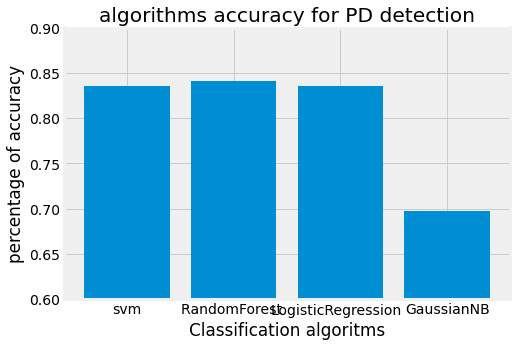

In [48]:
plt.figure(figsize=(8,5))
plt.style.use("fivethirtyeight")
plt.bar(alg,num)
plt.title("algorithms accuracy for PD detection")
plt.xlabel("Classification algoritms")
plt.ylabel("percentage of accuracy")
ax=plt.gca()
ax.set_ylim([0.6,0.9])

In [49]:
x.shape[0],y.shape[0]

(195, 195)

#  After Feature Selection-SelectFromModel

In [50]:
sel=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1))

In [51]:
sel.fit(x,y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
       

In [52]:
x.shape

(195, 22)

In [53]:
x.columns[sel.get_support()]

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:RAP', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')

In [54]:
sx=sel.transform(x)

In [55]:
score1=[]

In [56]:
def svm(x_train,x_test,y_train,y_test):
    clf1=SVC(kernel="linear",C=10,random_state=0)
    clf1.fit(x_train,y_train)
    score1.append(clf1.score(x_test,y_test))

In [57]:
def random_forest(x_train,x_test,y_train,y_test):
    clf2=RandomForestClassifier(n_estimators=30,random_state=0)
    clf2.fit(x_train,y_train)
    score1.append(clf2.score(x_test,y_test))

In [58]:
def logistic_regression(x_train,x_test,y_train,y_test):
    clf3=LogisticRegression(C=15,random_state=0)
    clf3.fit(x_train,y_train)
    score1.append(clf3.score(x_test,y_test))

In [59]:
def gaussianNB(x_train,x_test,y_train,y_test):
    clf4=GaussianNB()
    clf4.fit(x_train,y_train)
    score1.append(clf4.score(x_test,y_test))

In [60]:
sx=sel.transform(x)

In [61]:
score_of_rfe=[]

In [62]:
clf=GridSearchCV(SVC(),{"kernel":["linear","rbf"],"C":[10,20,30]},cv=10,return_train_score=False)

In [63]:
clf.fit(sx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 20, 30], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
score_of_rfe.append(clf.best_score_)

In [65]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [66]:
clf=GridSearchCV(RandomForestClassifier(),{"n_estimators":[10,20,30,40,50]},cv=10,return_train_score=False)

In [67]:
clf.fit(sx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [68]:
score_of_rfe.append(clf.best_score_)

In [69]:
clf.best_params_

{'n_estimators': 10}

In [70]:
clf=GridSearchCV(LogisticRegression(),{ },cv=10,return_train_score=False)

In [71]:
clf.fit(sx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [72]:
score_of_rfe.append(clf.best_score_)

In [73]:
clf=GridSearchCV(GaussianNB(),{ },cv=10,return_train_score=False)

In [74]:
clf.fit(sx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs', refit=True,
             return_train_score=False, scoring=None, verbose=0)

In [75]:
score_of_rfe.append(clf.best_score_)

In [76]:
score_of_rfe

[0.8358974358974359, 0.841025641025641, 0.8307692307692308, 0.7282051282051282]

(0.7, 0.9)

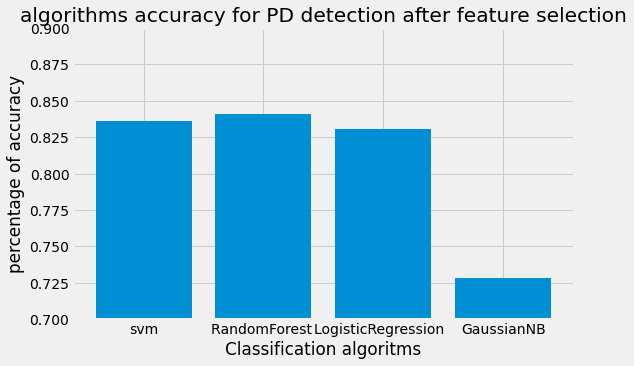

In [77]:
plt.figure(figsize=(8,5))
plt.style.use("fivethirtyeight")
plt.bar(alg,score_of_rfe)
plt.title("algorithms accuracy for PD detection after feature selection")
plt.xlabel("Classification algoritms")
plt.ylabel("percentage of accuracy")
ax=plt.gca()
ax.set_ylim([0.7,0.9])

#  RECURSIVE FEATURE ELEMIATION-random_forest_classifier

In [451]:
rfe=RFE(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),n_features_to_select=6)

In [452]:
rfe.fit(x,y)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=6, step=1, verbose=0)

In [453]:
x.columns[rfe.get_support()]

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'Shimmer:APQ3', 'MDVP:APQ', 'spread1',
       'PPE'],
      dtype='object')

In [454]:
rx=rfe.transform(x)

In [455]:
score_of_r=[]

In [456]:
clf=GridSearchCV(SVC(),{"kernel":["linear","rbf"],"C":[10,20,30] },cv=10,return_train_score=False)

In [457]:
clf.fit(rx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 20, 30], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [458]:
score_of_r.append(clf.best_score_)

In [560]:
clf=GridSearchCV(RandomForestClassifier(),{"n_estimators":[10,20,30,40,50]},cv=10,return_train_score=False)

In [561]:
clf.fit(rx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [461]:
score_of_r.append(clf.best_score_)

In [462]:
clf.best_params_

{'n_estimators': 10}

In [463]:
clf=GridSearchCV(LogisticRegression(),{ },cv=10,return_train_score=False)

In [464]:
clf.fit(rx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [465]:
score_of_r.append(clf.best_score_)

In [466]:
clf=GridSearchCV(GaussianNB(),{ },cv=10,return_train_score=False)

In [467]:
clf.fit(rx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs', refit=True,
             return_train_score=False, scoring=None, verbose=0)

In [468]:
score_of_r.append(clf.best_score_)

In [495]:
score_of_r

[0.8507692307692308,
 0.8974358974358975,
 0.8458974358974359,
 0.7846153846153846]

(0.7, 0.9)

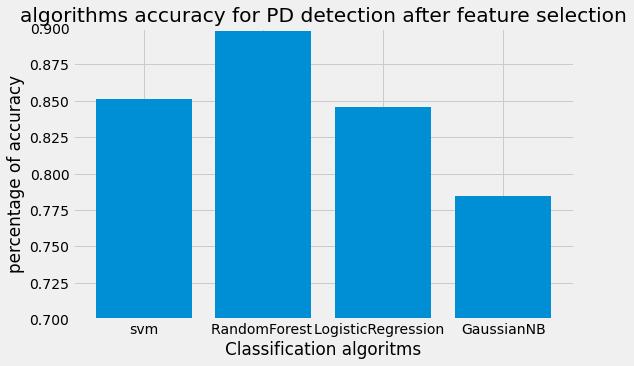

In [496]:
plt.figure(figsize=(8,5))
plt.style.use("fivethirtyeight")
plt.bar(alg,score_of_r)
plt.title("algorithms accuracy for PD detection after feature selection")
plt.xlabel("Classification algoritms")
plt.ylabel("percentage of accuracy")
ax=plt.gca()
ax.set_ylim([0.7,0.9])

# RECURSIVE FEATURE ELEMIATION-GradientBoosting

In [471]:
from sklearn.ensemble import GradientBoostingClassifier

In [472]:
gbc=RFE(GradientBoostingClassifier(n_estimators=100,random_state=0),n_features_to_select=10)

In [473]:
gbc.fit(x,y)

RFE(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                         learning_rate=0.1, loss='deviance',
                                         max_depth=3, max_features=None,
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=100,
                                         n_iter_no_change=None, presort='auto',
                                         random_state=0, subsample=1.0,
                                         tol=0.0001, validation_fraction=0.1,
                                         verbose=0, warm_start=False),
    n_features_to_sele

In [474]:
x.columns[gbc.get_support()]

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [475]:
gx=gbc.transform(x)

In [476]:
score_of_g=[]

In [477]:
clf=GridSearchCV(SVC(),{"kernel":["linear","rbf"],"C":[10,20,30]},cv=10,return_train_score=False)

In [478]:
clf.fit(gx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 20, 30], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [479]:
score_of_g.append(clf.best_score_)

In [480]:
clf.best_params_

{'C': 20, 'kernel': 'linear'}

In [481]:
clf=GridSearchCV(RandomForestClassifier(),{"n_estimators":[10,20,30,40,50]},cv=10,return_train_score=False)

In [482]:
clf.fit(gx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [483]:
score_of_g.append(clf.best_score_)

In [484]:
clf.best_params_

{'n_estimators': 40}

In [485]:
clf=GridSearchCV(LogisticRegression(),{ },cv=10,return_train_score=False)

In [486]:
clf.fit(gx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [487]:
score_of_g.append(clf.best_score_)

In [488]:
clf=GridSearchCV(GaussianNB(),{ },cv=10,return_train_score=False)

In [489]:
clf.fit(gx,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs', refit=True,
             return_train_score=False, scoring=None, verbose=0)

In [490]:
score_of_g.append(clf.best_score_)

In [491]:
np.array(score_of_g)*100

array([84.61538462, 86.66666667, 84.1025641 , 80.        ])

In [492]:
score_of_g

[0.8461538461538461, 0.8666666666666667, 0.841025641025641, 0.8]

(0.7, 0.9)

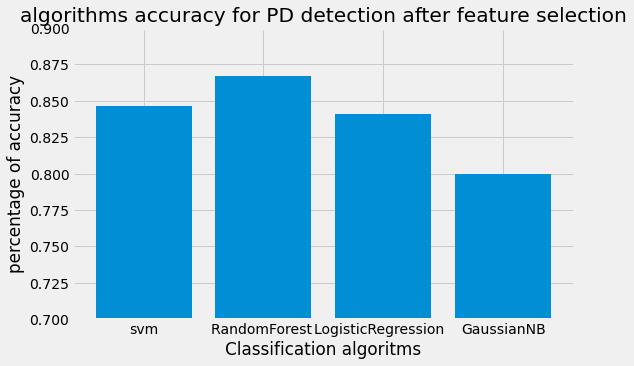

In [493]:
plt.figure(figsize=(8,5))
plt.style.use("fivethirtyeight")
plt.bar(alg,score_of_g)
plt.title("algorithms accuracy for PD detection after feature selection")
plt.xlabel("Classification algoritms")
plt.ylabel("percentage of accuracy")
ax=plt.gca()
ax.set_ylim([0.7,0.9])

# accuracy for number of featurs

In [200]:
p=df.drop(["name","status"],axis="columns")

In [201]:
q=df["status"]

In [202]:
p.shape[1]

22

In [600]:
def random_forest(x,y):
    clf=GridSearchCV(RandomForestClassifier(),{"n_estimators":[10,20,30,40,50]},cv=10,return_train_score=False)
    clf.fit(x,y)
    #print("accuracy :",clf.best_score_)
    return clf.best_score_
    

In [601]:
index_values=[]
acc_values=[]
for index in range(1,22):
    gbc=RFE(RandomForestClassifier(n_estimators=100,random_state=0),n_features_to_select=index)
    gbc.fit(p,q)
    gp=gbc.transform(p)
    #print("selected features :",index)
    acc_values1=random_forest(gp,q)
    index_values.append(index)
    acc_values.append(acc_values1)
    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarn

In [612]:
f=[index_values,acc_values]
each_fea=pd.DataFrame(f)

In [615]:
each_fea=each_fea.T

In [621]:
each_fea.columns=["number_of_features","accuracy"]

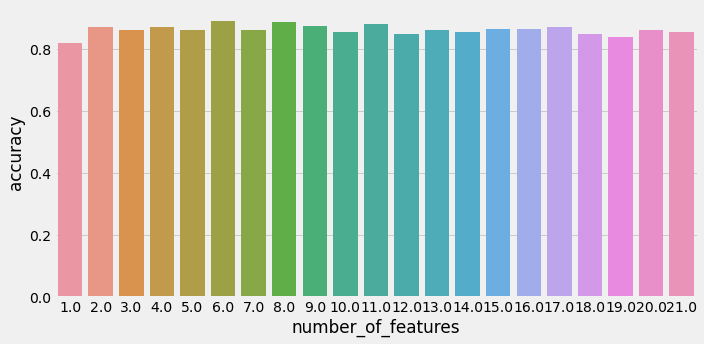

In [623]:
sns.catplot(data=each_fea,x="number_of_features",y="accuracy",kind="bar",aspect=2)

# Random_Forest_Prediction _ Test

In [126]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [127]:
df.shape

(195, 24)

In [128]:
gx=pd.DataFrame(gx)

In [129]:
x.columns[rfe.get_support()]

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'Shimmer:APQ3', 'MDVP:APQ', 'spread1',
       'PPE'],
      dtype='object')

In [130]:
gx

,0,1,2,3,4,5,6,7,8,9
0,119.992,157.302,0.426,0.03130,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,0.626,0.04518,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,0.482,0.03858,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,0.517,0.04005,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,0.584,0.04825,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,0.405,0.02498,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,0.263,0.01657,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,0.256,0.01365,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,0.241,0.01321,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [131]:
gx.shape

(195, 10)

In [132]:
b=gx.iloc[0,0:]

In [133]:
b

0    119.992000
1    157.302000
2      0.426000
3      0.031300
4      0.414783
5      0.815285
6     -4.813031
7      0.266482
8      2.301442
9      0.284654
Name: 0, dtype: float64

In [134]:
clf.predict([b])

array([1], dtype=int64)

In [135]:
clf.predict(gx)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

#  Accuracy comparision of before and after feature selection 

In [512]:
import seaborn as sns

In [497]:
num

[0.8358974358974359, 0.841025641025641, 0.8358974358974359, 0.6974358974358974]

In [498]:
score_of_r

[0.8507692307692308,
 0.8974358974358975,
 0.8458974358974359,
 0.7846153846153846]

In [499]:
alg

['svm', 'RandomForest ', 'LogisticRegression  ', 'GaussianNB']

In [500]:
acc=[alg,num,score_of_r]

In [501]:
acc

[['svm', 'RandomForest ', 'LogisticRegression  ', 'GaussianNB'],
 [0.8358974358974359,
  0.841025641025641,
  0.8358974358974359,
  0.6974358974358974],
 [0.8507692307692308,
  0.8974358974358975,
  0.8458974358974359,
  0.7846153846153846]]

In [505]:
acc=pd.DataFrame(acc)

In [507]:
acc=acc.T

In [508]:
acc

,0,1,2
0,svm,0.835897,0.850769
1,RandomForest,0.841026,0.897436
2,LogisticRegression,0.835897,0.845897
3,GaussianNB,0.697436,0.784615


In [509]:
acc.columns=["algorithms","before_fea_selection","after_fea_selection"]

In [510]:
acc

,algorithms,before_fea_selection,after_fea_selection
0,svm,0.835897,0.850769
1,RandomForest,0.841026,0.897436
2,LogisticRegression,0.835897,0.845897
3,GaussianNB,0.697436,0.784615


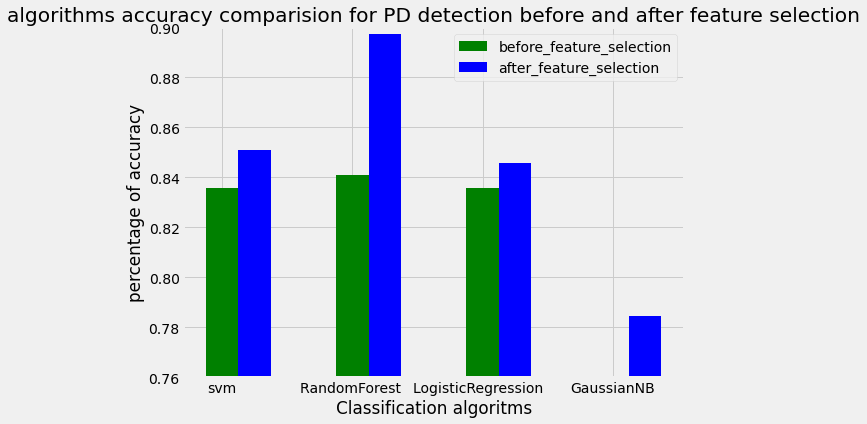

In [555]:
plt.figure(figsize=(8,6))
plt.style.use("fivethirtyeight")
w=np.arange(4)
plt.bar(w,acc.before_fea_selection,width=0.25,label="before_feature_selection",color="g")
plt.bar(w+0.25,acc.after_fea_selection,width=0.25,label="after_feature_selection",color="b")

plt.title("algorithms accuracy comparision for PD detection before and after feature selection")
plt.xlabel("Classification algoritms")
plt.ylabel("percentage of accuracy")
plt.xticks(ticks=w,labels=alg)
ax=plt.gca()
plt.legend()
ax.set_ylim([0.76,0.9])
plt.show()

# confusion matrix

In [556]:
from sklearn.metrics import confusion_matrix

In [559]:
clf=RandomForestClassifier(n_estimators=10)

In [576]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [577]:
rfe.fit(x_test,y_test)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=6, step=1, verbose=0)

In [578]:
x_test.columns[rfe.get_support()]

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:RAP', 'Jitter:DDP', 'spread1',
       'PPE'],
      dtype='object')

In [584]:
test_co=rfe.transform(x_test)

In [585]:
pred=clf.predict(test_co)

In [597]:
print(confusion_matrix(pred,y_test))

[[16  3]
 [ 8 71]]


In [595]:
confus=confusion_matrix(pred,y_test)

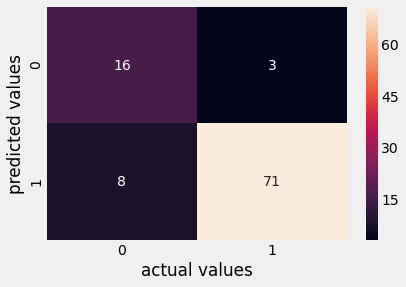

In [599]:
sns.heatmap(confus,annot=True)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.show()